## PyTorch 학습 레벨 2 - 001
---

### 순서
- _~~Tensor~~_
- Augograd
- DataSet, DataLoader
- Transform

In [1]:
import numpy as np
import torch

### Tensor
- Tensor(텐서)는 Numpy의 ndarray와 유사한 특수 자료형
- PyTorch에서는 텐서를 사용 모델의 입력과 출력, 매개변수들을 부호화(encoding)

- Numpy와 Tensor는 동일한 내부구조를 공유. 단, GPU를 사용할 수 있다는 점만 차이
- Tensor는 Autograd(자동미분)에 최적화 되어 있음

### 1. Initialize Tensor

#### 데이터로 직접생성

In [16]:
# 하나라도 소수점을 찍으면 모든 요소가 float화 됨
x = [[1, 2],[3, 4.]]
tensor_x = torch.tensor(x)
tensor_x

tensor([[1., 2.],
        [3., 4.]])

#### Numpy를 변형, 생성

In [11]:
narray = np.array(x)
narray

array([[1., 2.],
       [3., 4.]])

In [12]:
tensor_np = torch.from_numpy(narray)
tensor_np

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

#### 다른 방법
- 명시적으로 재정의(override)하지 않으면, 인자로 주어진 Tensor 속성(모양(shape), 자료형(datatype))을 유지

In [22]:
ones_x = torch.ones_like(tensor_x) # , dtype=torch.int64) # 데이터타입 설정
ones_x

tensor([[1., 1.],
        [1., 1.]])

In [24]:
zeros_x = torch.zeros_like(tensor_x) # , dtype=torch.int64) # 데이터타입 설정
zeros_x

tensor([[0., 0.],
        [0., 0.]])

In [25]:
rand_x = torch.rand_like(tensor_x)
rand_x

tensor([[0.3258, 0.5098],
        [0.8040, 0.4555]])

In [26]:
randn_x = torch.randn_like(tensor_x)
randn_x

tensor([[-0.4891,  1.1529],
        [ 0.7452,  0.3608]])

#### shape 사용 == size

In [31]:
shape = (3, 4) # size
rand_y = torch.rand(shape)

rand_y

tensor([[0.0444, 0.6804, 0.3741, 0.3331],
        [0.5641, 0.7834, 0.5764, 0.5407],
        [0.0893, 0.4645, 0.8782, 0.6303]])

In [29]:
torch.randn(shape)

tensor([[-0.1053, -0.3802,  1.2611,  0.4437],
        [ 1.3979,  1.1228,  1.1377, -0.1064],
        [ 0.9539, -0.5034, -0.2658, -0.0215]])

In [30]:
torch.ones(shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [32]:
torch.zeros(shape)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### 2. Attribute of Tensor

- 텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 저장장치 설정 등

In [33]:
tensor_z = torch.rand(4, 5)

In [34]:
tensor_z

tensor([[0.6642, 0.6552, 0.0135, 0.0057, 0.4253],
        [0.2883, 0.9247, 0.6103, 0.9424, 0.0984],
        [0.7389, 0.9142, 0.6756, 0.0271, 0.4904],
        [0.9005, 0.6029, 0.6661, 0.6147, 0.0703]])

In [35]:
f'텐서 모양: {tensor_z.shape}'

'텐서 모양: torch.Size([4, 5])'

In [36]:
f'텐서 데이터형: {tensor_z.dtype}'

'텐서 데이터형: torch.float32'

In [37]:
f'텐서 저장소: {tensor_z.device}'

'텐서 저장소: cpu'

#### GPU 사용하려면...

In [2]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'

DEVICE

'cuda'

In [43]:
tensor_z_gpu = tensor_z.to(DEVICE)

In [44]:
f'텐서 저장소: {tensor_z_gpu.device}'

'텐서 저장소: cuda:0'

### 3. Tensor operations
- 수많은 연산에 대한 내용은 [참조링크](https://pytorch.org/docs/stable/torch.html) 확인
- 위에서 본 GPU로 이동하면, 연산 시간 및 공간 절약
- Numpy 연산과 유사!

In [48]:
# GPU가 존재하면 텐서를 이동
tensor = tensor_z

if torch.cuda.is_available():
    tensor = tensor.to(DEVICE)  # 같은 변수명으로 덮어씌우는 것 추천(메모리 절약면)
    print(tensor)

print(f'Device tensor is stored on: {tensor.device}')

tensor([[0.6642, 0.6552, 0.0135, 0.0057, 0.4253],
        [0.2883, 0.9247, 0.6103, 0.9424, 0.0984],
        [0.7389, 0.9142, 0.6756, 0.0271, 0.4904],
        [0.9005, 0.6029, 0.6661, 0.6147, 0.0703]], device='cuda:0')
Device tensor is stored on: cuda:0


#### 인덱싱, 슬라이싱
- Numpy와 동일

In [3]:
tensor = torch.rand(4, 4)
tensor

tensor([[0.5819, 0.9129, 0.9531, 0.6309],
        [0.4820, 0.3969, 0.0148, 0.6980],
        [0.8121, 0.0394, 0.8732, 0.3338],
        [0.0659, 0.4022, 0.8110, 0.9602]])

In [4]:
# row, column 인덱싱
tensor[0, 3]

tensor(0.6309)

In [5]:
# row 슬라이싱
tensor[1]

tensor([0.4820, 0.3969, 0.0148, 0.6980])

In [6]:
# column 슬라이싱
tensor[:, 1]

tensor([0.9129, 0.3969, 0.0394, 0.4022])

In [7]:
# 마지막 column 슬라이싱
tensor[..., -1]

tensor([0.6309, 0.6980, 0.3338, 0.9602])

In [8]:
# 2번 column 값 모두 변경
tensor[:, 2] = 0.999

In [9]:
tensor

tensor([[0.5819, 0.9129, 0.9990, 0.6309],
        [0.4820, 0.3969, 0.9990, 0.6980],
        [0.8121, 0.0394, 0.9990, 0.3338],
        [0.0659, 0.4022, 0.9990, 0.9602]])

#### Tensor 결합
- cat(concatenate), stack() 등 활용

In [10]:
# concatenate
tensor.shape

torch.Size([4, 4])

In [11]:
# 0번 차원에 모두 결합(행으로 쌓음음)
tensor1 = torch.cat([tensor, tensor, tensor], dim=0)
tensor1

tensor([[0.5819, 0.9129, 0.9990, 0.6309],
        [0.4820, 0.3969, 0.9990, 0.6980],
        [0.8121, 0.0394, 0.9990, 0.3338],
        [0.0659, 0.4022, 0.9990, 0.9602],
        [0.5819, 0.9129, 0.9990, 0.6309],
        [0.4820, 0.3969, 0.9990, 0.6980],
        [0.8121, 0.0394, 0.9990, 0.3338],
        [0.0659, 0.4022, 0.9990, 0.9602],
        [0.5819, 0.9129, 0.9990, 0.6309],
        [0.4820, 0.3969, 0.9990, 0.6980],
        [0.8121, 0.0394, 0.9990, 0.3338],
        [0.0659, 0.4022, 0.9990, 0.9602]])

In [12]:
tensor1.shape

torch.Size([12, 4])

In [13]:
# 1번 차원에 모두 결합(열로 붙임)
tensor2 = torch.cat([tensor, tensor, tensor], dim=1)
tensor2

tensor([[0.5819, 0.9129, 0.9990, 0.6309, 0.5819, 0.9129, 0.9990, 0.6309, 0.5819,
         0.9129, 0.9990, 0.6309],
        [0.4820, 0.3969, 0.9990, 0.6980, 0.4820, 0.3969, 0.9990, 0.6980, 0.4820,
         0.3969, 0.9990, 0.6980],
        [0.8121, 0.0394, 0.9990, 0.3338, 0.8121, 0.0394, 0.9990, 0.3338, 0.8121,
         0.0394, 0.9990, 0.3338],
        [0.0659, 0.4022, 0.9990, 0.9602, 0.0659, 0.4022, 0.9990, 0.9602, 0.0659,
         0.4022, 0.9990, 0.9602]])

In [14]:
tensor2.shape

torch.Size([4, 12])

In [15]:
# stack - 차원을 늘리면서 쌓기, 2차원 -> 3차원으로
# 0번째 차원을 새로 생성하면서 합침
tensor3 = torch.stack([tensor, tensor, tensor], dim=0)
tensor3.shape

torch.Size([3, 4, 4])

In [16]:
# 1번째 차원을 새로 생성하면서 합침
tensor4 = torch.stack([tensor, tensor, tensor], dim=1)
tensor4.shape

torch.Size([4, 3, 4])

In [17]:
# 2번째 차원을 새로 생성하면서 합침
tensor5 = torch.stack([tensor, tensor, tensor], dim=2)
tensor5.shape

torch.Size([4, 4, 3])

#### Arthimetic operations
- 행렬합, 행렬곱 등의 행렬과 관련된 연산들이 존재

In [18]:
tensor = torch.rand(3, 4)
tensor.shape

torch.Size([3, 4])

In [19]:
# 두 텐서간 행렬 곱 
tensor

tensor([[0.4381, 0.0558, 0.0198, 0.3829],
        [0.4294, 0.5172, 0.5824, 0.0250],
        [0.8205, 0.7542, 0.9629, 0.5941]])

In [20]:
# 전치: 행과 열을 서로 바꾸는 연산
tensor.T # 텐서의 전치(transpose)를 반환

tensor([[0.4381, 0.4294, 0.8205],
        [0.0558, 0.5172, 0.7542],
        [0.0198, 0.5824, 0.9629],
        [0.3829, 0.0250, 0.5941]])

In [22]:
# matrix multiplication, 3 X 3으로 변경경
tensor @ tensor.T

tensor([[0.3420, 0.2381, 0.6481],
        [0.2381, 0.7917, 1.3180],
        [0.6481, 1.3180, 2.5220]])

In [24]:
# 위와 동일
tensor.matmul(tensor.T)

tensor([[0.3420, 0.2381, 0.6481],
        [0.2381, 0.7917, 1.3180],
        [0.6481, 1.3180, 2.5220]])

In [25]:
# 요소별 곱(element-wise product)을 계산, 3x4
tensor * tensor

tensor([[1.9189e-01, 3.1146e-03, 3.9337e-04, 1.4663e-01],
        [1.8436e-01, 2.6753e-01, 3.3917e-01, 6.2301e-04],
        [6.7314e-01, 5.6883e-01, 9.2711e-01, 3.5296e-01]])

In [26]:
tensor.mul(tensor)

tensor([[1.9189e-01, 3.1146e-03, 3.9337e-04, 1.4663e-01],
        [1.8436e-01, 2.6753e-01, 3.3917e-01, 6.2301e-04],
        [6.7314e-01, 5.6883e-01, 9.2711e-01, 3.5296e-01]])

In [28]:
# 요소곱은 텐서의 크기가 동일해야 함
tensor.mul(tensor.T)

RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1

In [29]:
tensor_z = torch.rand_like(tensor)
tensor_z

tensor([[0.7831, 0.5778, 0.3874, 0.6795],
        [0.1475, 0.7146, 0.6006, 0.5169],
        [0.5036, 0.0121, 0.0307, 0.6372]])

In [31]:
torch.mul(tensor, tensor, out=tensor_z)

tensor([[1.9189e-01, 3.1146e-03, 3.9337e-04, 1.4663e-01],
        [1.8436e-01, 2.6753e-01, 3.3917e-01, 6.2301e-04],
        [6.7314e-01, 5.6883e-01, 9.2711e-01, 3.5296e-01]])

In [32]:
tensor_z

tensor([[1.9189e-01, 3.1146e-03, 3.9337e-04, 1.4663e-01],
        [1.8436e-01, 2.6753e-01, 3.3917e-01, 6.2301e-04],
        [6.7314e-01, 5.6883e-01, 9.2711e-01, 3.5296e-01]])

In [33]:
tensor_z1 = torch.mul(tensor, tensor)

In [34]:
tensor_z1

tensor([[1.9189e-01, 3.1146e-03, 3.9337e-04, 1.4663e-01],
        [1.8436e-01, 2.6753e-01, 3.3917e-01, 6.2301e-04],
        [6.7314e-01, 5.6883e-01, 9.2711e-01, 3.5296e-01]])

In [35]:
tensor.mul(torch.zeros(3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [36]:
tensor.mul(torch.ones(3, 4))

tensor([[0.4381, 0.0558, 0.0198, 0.3829],
        [0.4294, 0.5172, 0.5824, 0.0250],
        [0.8205, 0.7542, 0.9629, 0.5941]])

#### 단일요소화 
- sum() 등....

In [40]:
agg = tensor.sum()
agg, agg.type

(tensor(5.5822), <function Tensor.type>)

In [42]:
agg.item(), type(agg.item())

(5.582189083099365, float)

#### In-place operation
- x.copy_(y), x.t_() 등 _를 사용
- 메모리 일부 절약. 기록이 삭제되어 derivative(도함수) 계산 등에 문제가 발생하므로, 권장하지 않음

### Bridge
- Numpy to Tensor, Tensor to Numpy 

#### Tensor to Numpy

In [44]:
tensor = torch.ones(2, 5)
tensor, type(tensor)

(tensor([[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]),
 torch.Tensor)

In [45]:
nmpy = tensor.numpy()
nmpy, type(nmpy)

(array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=float32),
 numpy.ndarray)

##### Tensor 변경사항이 곧바로 Numpy에 적용!
- 얕은 복사

In [46]:
tensor.add_(2)
tensor

tensor([[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]])

In [47]:
nmpy

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]], dtype=float32)

#### Numpy to Tensor

In [49]:
nmpy = np.ones(4)
tensor = torch.from_numpy(nmpy)
tensor

tensor([1., 1., 1., 1.], dtype=torch.float64)

In [51]:
np.add(nmpy, 4, out=nmpy)
nmpy, tensor

(array([7., 7., 7., 7.]), tensor([7., 7., 7., 7.], dtype=torch.float64))

#### PyTorch 특징
- NumPy와 유사하지만 GPU 상에서 실행 가능한 n-차원 텐서(Tensor)
- 신경망을 구성하고 학습하는 과정에서의 자동 미분(Automatic differentiation)


#### $y=\sin(x)$ 에 근사(fit)하는 문제 
- 3차 다항식을 사용

##### Numpy를 사용했을 때
- `NumPy`를 사용하여 신경망을 구성
- NumPy 연산을 사용하여 신경망의 순전파 단계와 역전파 단계를 직접 구현함으로써, 3차 다항식이 사인(sine) 함수에 근사

In [91]:
import numpy as np
import math
import time

In [92]:
# np.linspace() - start에서 end까지 균일한 간격을 갖는 크기 step의 1차원 텐서를 생성하는 함수
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x) # np.sin() - 주어진 배열의 요소들의 sin값을 반환하는 함수

# 랜덤하게 가중치 초기화
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

print(f'------------------ init ------------------')
print(f'x({len(x)}) : {x}')
print(f'y({len(y)}) : {y}')
print(f'가중치 초기값 : ')
print(f'  a : {a}')
print(f'  b : {b}')
print(f'  c : {c}')
print(f'  d : {d}')
print(f'------------------------------------------')

------------------ init ------------------
x(2000) : [-3.14159265 -3.13844949 -3.13530633 ...  3.13530633  3.13844949
  3.14159265]
y(2000) : [-1.22464680e-16 -3.14315906e-03 -6.28628707e-03 ...  6.28628707e-03
  3.14315906e-03  1.22464680e-16]
가중치 초기값 : 
  a : 1.066816972223874
  b : 0.18750529562685805
  c : -0.7410503150368684
  d : 0.3651209355870561
------------------------------------------


$$ y =  a + b x + c x^{2} + d x^{3} $$

In [93]:
start_time = time.process_time()

learning_rate = 1e-6
for t in range(2000):
    # 순전파: 예측값 y를 계산
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)계산, 출력
    loss = np.square(y_pred - y).sum()  # np.square - 주어진 배열의 요소들의 제곱값을 반환하는 함수
    if t % 100 == 99:
        print(f'[t = {t+1:4d}] loss : {loss:.3f}')

    # 손실에 따른 a, b, c, d의 변화도(gradient) 계산, 역전파
    grad_y_pred = 2.0 * (y_pred - y)  ## loss를 구할때 np.square(y_pred - y)로 계산, 미분하면 ^2가 피연산으로 내려옴
    ## (y_pred - y)^2  → 2 * (y_pred - y)
    grad_a = grad_y_pred.sum()  ## loss function의 미분값을 계산해서 모두 더함
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치 갱신.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    
print(f'------------------------------------------')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

end_time = time.process_time()

print(f'time elapsed : {int(round((end_time - start_time) * 1000))} ms')

[t =  100] loss : 1221.548
[t =  200] loss : 850.183
[t =  300] loss : 593.086
[t =  400] loss : 414.920
[t =  500] loss : 291.332
[t =  600] loss : 205.523
[t =  700] loss : 145.889
[t =  800] loss : 104.410
[t =  900] loss : 75.534
[t = 1000] loss : 55.414
[t = 1100] loss : 41.385
[t = 1200] loss : 31.595
[t = 1300] loss : 24.758
[t = 1400] loss : 19.980
[t = 1500] loss : 16.639
[t = 1600] loss : 14.301
[t = 1700] loss : 12.664
[t = 1800] loss : 11.517
[t = 1900] loss : 10.713
[t = 2000] loss : 10.149
------------------------------------------
Result: y = 0.03653609263451868 + 0.845234923242257 x + -0.006303083942660136 x^2 + -0.09169377213899549 x^3
time elapsed : 312 ms


In [94]:
import matplotlib.pyplot as plt

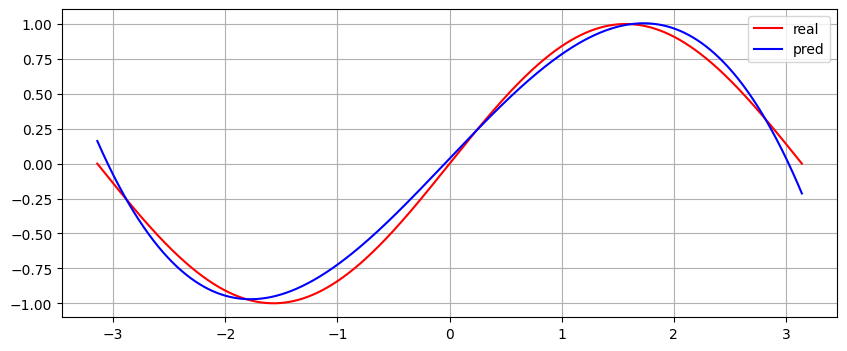

In [95]:
def show(x, y, y_pred):
    fig = plt.figure(figsize=(10, 4))

    plt.plot(x, y, color='r', label='real')
    plt.plot(x, y_pred, color='b', label='pred')
    plt.legend()
    plt.grid(True)
    plt.show()

show(x, y, a + b * x + c * x ** 2 + d * x ** 3)

##### Tensor를 사용했을 때
- Numpy는 GPU를 사용하여 수치 연산을 가속화못함
- PyTorch 텐서(Tensor)는 개념적으로 NumPy 배열과 동일
- NumPy 배열처럼 PyTorch Tensor는 딥러닝이나 연산 그래프, 변화도는 알지 못하며, 과학적 분야의 연산을 위한 포괄적인 도구
- PyTorch 텐서는 GPU를 사용하여 수치 연산을 가속


In [96]:
x.shape

(2000,)

In [101]:
import torch
import math
import time

In [102]:
DEVICE

'cuda'

In [103]:
dtype = torch.float
device = torch.device(DEVICE)

In [104]:
# 랜덤하게 입력과 출력 데이터를 생성
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# 가중치 초기화
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

print(f'------------------ init ------------------')
print(f'x({len(x)}, {x.__class__}) : {x}')
print(f'y({len(y)}, {y.__class__}) : {y}')
print(f'가중치 초기값 : ')
print(f'  a({a.__class__}) : {a}')
print(f'  b({b.__class__}) : {b}')
print(f'  c({c.__class__}) : {c}')
print(f'  d({d.__class__}) : {d}')
print(f'------------------------------------------')

------------------ init ------------------
x(2000, <class 'torch.Tensor'>) : tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416],
       device='cuda:0')
y(2000, <class 'torch.Tensor'>) : tensor([ 8.7423e-08, -3.1430e-03, -6.2863e-03,  ...,  6.2863e-03,
         3.1430e-03, -8.7423e-08], device='cuda:0')
가중치 초기값 : 
  a(<class 'torch.Tensor'>) : -1.4007394313812256
  b(<class 'torch.Tensor'>) : -0.44721704721450806
  c(<class 'torch.Tensor'>) : 1.0748897790908813
  d(<class 'torch.Tensor'>) : -0.8449921011924744
------------------------------------------


In [105]:
start_time = time.process_time()

learning_rate = 1e-6
for t in range(2000):
    # 순전파 단계: 예측값 y를 계산합니다
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # 손실(loss)을 계산하고 출력합니다
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(f'[t = {t+1:4d}] loss : {loss:.3f}')

    # 손실에 따른 a, b, c, d의 변화도(gradient)를 계산하고 역전파합니다.
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # 가중치를 갱신합니다.
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'------------------------------------------')
print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

end_time = time.process_time()

print(f'time elapsed : {int(round((end_time - start_time) * 1000))} ms')

[t =  100] loss : 2470.722
[t =  200] loss : 1706.293
[t =  300] loss : 1180.485
[t =  400] loss : 818.407
[t =  500] loss : 568.802
[t =  600] loss : 396.547
[t =  700] loss : 277.544
[t =  800] loss : 195.246
[t =  900] loss : 138.274
[t = 1000] loss : 98.794
[t = 1100] loss : 71.409
[t = 1200] loss : 52.396
[t = 1300] loss : 39.183
[t = 1400] loss : 29.994
[t = 1500] loss : 23.596
[t = 1600] loss : 19.139
[t = 1700] loss : 16.031
[t = 1800] loss : 13.862
[t = 1900] loss : 12.348
[t = 2000] loss : 11.290
------------------------------------------
Result: y = -0.04850983992218971 + 0.83798748254776 x + 0.00836875382810831 x^2 + -0.0906628891825676 x^3
time elapsed : 1422 ms


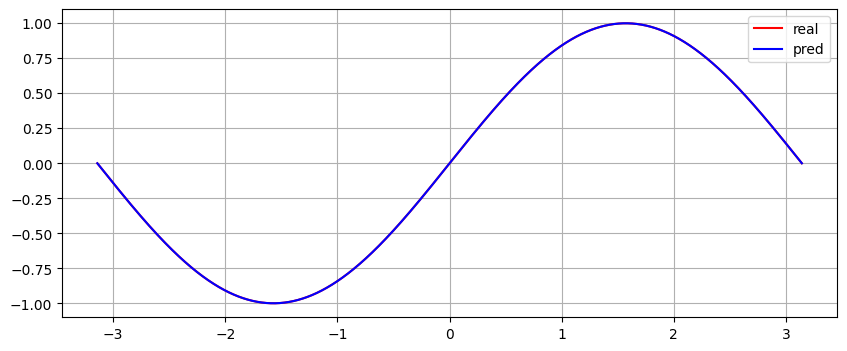

In [106]:
def show_tensor(x, y, y_pred):
    x = x.to('cpu') ## cuda값은 그대로 numpy 처럼 사용할 수 없음!
    y = y.to('cpu')
    y_pred = y.to('cpu') 
    fig = plt.figure(figsize=(10, 4))

    plt.plot(x, y, color='r', label='real') # 완전 겹쳐졌음
    plt.plot(x, y_pred, color='b', label='pred') 
    plt.legend()
    plt.grid(True)
    plt.show()

show_tensor(x, y, a + b * x + c * x ** 2 + d * x ** 3)

- 적은수의 데이터에서는 GPU(CUDA)가 그렇게 빠르지만은 않음
- 데이터를 cpu에서 GPU쪽으로 넘기는 작업등에 시간이 더 소요됨
- 단, 빅데이터(!)에서는 GPU의 성능이 발휘됨(확실히)